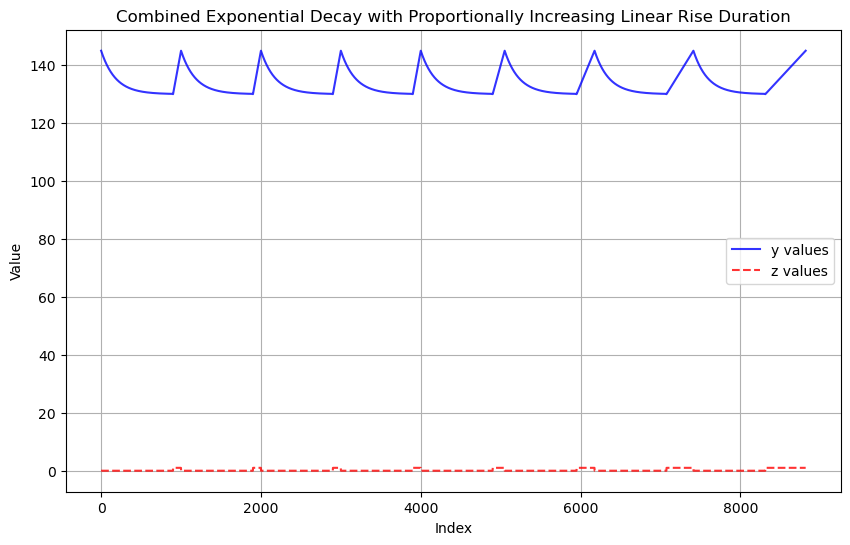

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def exp_decay(max_value, min_value, num_points, decay_rate=5):
    # Generate an exponentially decaying sequence
    x = np.linspace(0, 1, num_points)
    y = (max_value - min_value) * np.exp(-decay_rate * x) + min_value
    zeros = np.zeros(num_points)
    return pd.DataFrame({'y': y, 'z': zeros})

def line_rise(max_value, min_value, num_points, constant_value=1):
    # Generate a linearly increasing sequence
    x = np.linspace(0, 1, num_points)
    y = (max_value - min_value) * x + min_value
    z = np.full(num_points, constant_value)
    return pd.DataFrame({'y': y, 'z': z})

def generate_data_with_slower_increase(repetitions=4, growth_factor=1.8):
    # Generate constant exponential decay data
    decay = exp_decay(145, 130, 900)
    
    combined = pd.DataFrame()
    
    # Initial number of points for the line_rise
    line_points = 100
    
    # Loop through the repetitions, increasing the line_rise segment proportionally
    for i in range(3):
        line = line_rise(145, 130, int(line_points))
        
        # Concatenate decay and the increasing line segment
        combined = pd.concat([combined, decay, line], axis=0, ignore_index=True)

    # Loop through the repetitions, increasing the line_rise segment proportionally
    for i in range(repetitions):
        line = line_rise(145, 130, int(line_points))
        
        # Concatenate decay and the increasing line segment
        combined = pd.concat([combined, decay, line], axis=0, ignore_index=True)
        
        # Increase the number of points for the next line_rise by the growth factor
        line_points *= growth_factor
    
    return combined

# Generate the final combined data with increasing durations of line_rise proportionally
pump_failure = generate_data_with_slower_increase(repetitions=5, growth_factor=1.5)

# Plotting the final combined data
plt.figure(figsize=(10, 6))
plt.plot(pump_failure.index, pump_failure['y'], label='y values', color='b', alpha=0.8)
plt.plot(pump_failure.index, pump_failure['z'], label='z values', color='r', linestyle='--', alpha=0.8)

plt.title('Combined Exponential Decay with Proportionally Increasing Linear Rise Duration')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [81]:
pump_failure.index = pd.date_range(start='2024-04-01 00:00:00', periods=len(pump_failure), freq='5T')
pump_failure['y1'] = np.zeros(len(pump_failure))
pump_failure['z1'] = np.zeros(len(pump_failure))
pump_failure = pump_failure.iloc[:, [0, 2, 1, 3]]
pump_failure


/tmp/ipykernel_198216/3926434697.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  pump_failure.index = pd.date_range(start='2024-04-01 00:00:00', periods=len(pump_failure), freq='5T')


,y,y1,z,z1
2024-04-01 00:00:00,145.000000,0.0,0.0,0.0
2024-04-01 00:05:00,144.916806,0.0,0.0,0.0
2024-04-01 00:10:00,144.834072,0.0,0.0,0.0
2024-04-01 00:15:00,144.751798,0.0,0.0,0.0
2024-04-01 00:20:00,144.669980,0.0,0.0,0.0
...,...,...,...,...
2024-05-01 14:25:00,144.881188,0.0,1.0,0.0
2024-05-01 14:30:00,144.910891,0.0,1.0,0.0
2024-05-01 14:35:00,144.940594,0.0,1.0,0.0
2024-05-01 14:40:00,144.970297,0.0,1.0,0.0


2024-04-18 00:20:00


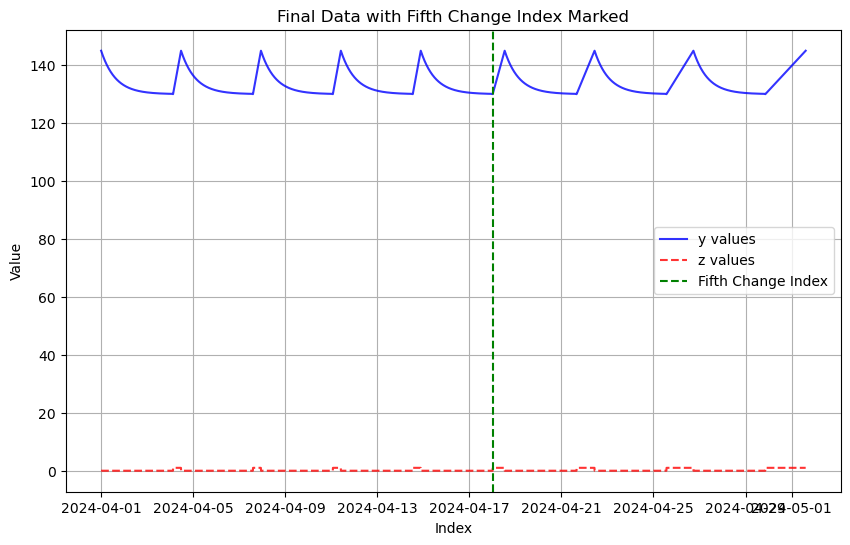

In [82]:
# Identify positions where 'z' changes from 0 to 1
change_positions = (pump_failure['z'].shift(1) == 0) & (pump_failure['z'] == 1)

# Find the index of the fifth occurrence
fifth_change_index = change_positions[change_positions].index[4]

# Display the index
print(fifth_change_index)
plt.figure(figsize=(10, 6))
plt.plot(pump_failure.index, pump_failure['y'], label='y values', color='b', alpha=0.8)
plt.plot(pump_failure.index, pump_failure['z'], label='z values', color='r', linestyle='--', alpha=0.8)

# Mark the fifth change index
plt.axvline(x=fifth_change_index, color='g', linestyle='--', label='Fifth Change Index')

plt.title('Final Data with Fifth Change Index Marked')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
pump_failure.to_csv('/home/ubuntu/TL-NAB/data/shf-hpu/pump_failure.csv')

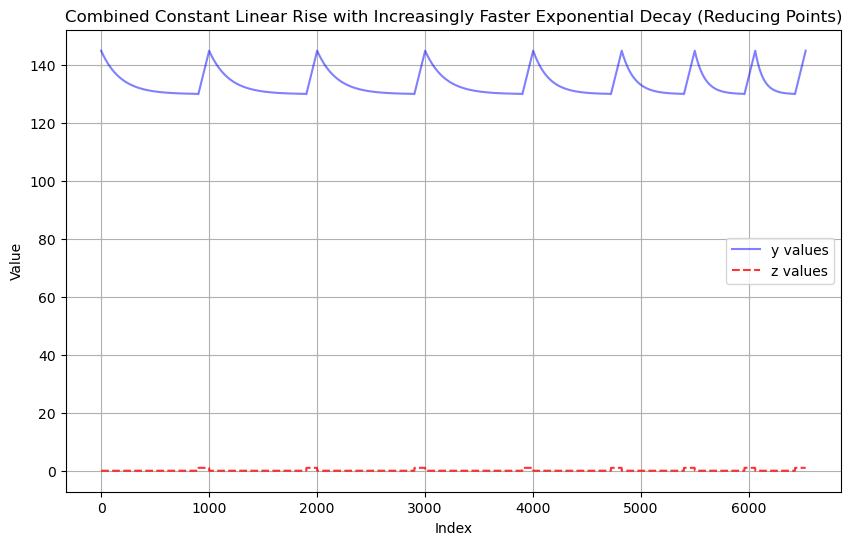

In [84]:
def generate_combined_data_with_faster_decay(repetitions=4, num_points_factor=0.8):
    # Generate constant line rise data
    line = line_rise(145, 130, 100)
    
    combined = pd.DataFrame()
    
    # Initial number of points for the exponential decay
    num_points = 900
    
    for i in range(3):
        decay = exp_decay(145, 130, int(num_points))
        
        # Concatenate decay and the constant line segment
        combined = pd.concat([combined, decay, line], axis=0, ignore_index=True)

    # Loop through the repetitions, reducing the number of points for exponential decay each time
    for i in range(repetitions):
        decay = exp_decay(145, 130, int(num_points))
        
        # Concatenate decay and the constant line segment
        combined = pd.concat([combined, decay, line], axis=0, ignore_index=True)
        
        # Reduce the number of points for the next exponential decay
        num_points *= num_points_factor
    
    return combined

# Generate the final combined data with increasingly faster exponential decays
inter_leakage = generate_combined_data_with_faster_decay(repetitions=5, num_points_factor=0.8)

# Plotting the final combined data with increasingly faster decays
plt.figure(figsize=(10, 6))
plt.plot(inter_leakage.index, inter_leakage['y'], label='y values', color='b', alpha=0.5)
plt.plot(inter_leakage.index, inter_leakage['z'], label='z values', color='r', linestyle='--', alpha=0.8)

plt.title('Combined Constant Linear Rise with Increasingly Faster Exponential Decay (Reducing Points)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
inter_leakage.index = pd.date_range(start='2024-04-01 00:00:00', periods=len(inter_leakage), freq='5T')
inter_leakage['y1'] = np.zeros(len(inter_leakage))
inter_leakage['z1'] = np.zeros(len(inter_leakage))
inter_leakage = inter_leakage.iloc[:, [0, 2, 1, 3]]

# Identify positions where 'z' changes from 0 to 1
change_positions = (inter_leakage['z'].shift(1) == 0) & (inter_leakage['z'] == 1)

# Find the index of the fifth occurrence
fifth_change_index = change_positions[change_positions].index[4]

# Display the index
print(fifth_change_index)

inter_leakage

2024-04-17 09:20:00


/tmp/ipykernel_198216/368884781.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  inter_leakage.index = pd.date_range(start='2024-04-01 00:00:00', periods=len(inter_leakage), freq='5T')


,y,y1,z,z1
2024-04-01 00:00:00,145.000000,0.0,0.0,0.0
2024-04-01 00:05:00,144.916806,0.0,0.0,0.0
2024-04-01 00:10:00,144.834072,0.0,0.0,0.0
2024-04-01 00:15:00,144.751798,0.0,0.0,0.0
2024-04-01 00:20:00,144.669980,0.0,0.0,0.0
...,...,...,...,...
2024-04-23 15:15:00,144.393939,0.0,1.0,0.0
2024-04-23 15:20:00,144.545455,0.0,1.0,0.0
2024-04-23 15:25:00,144.696970,0.0,1.0,0.0
2024-04-23 15:30:00,144.848485,0.0,1.0,0.0


2024-04-14 21:20:00


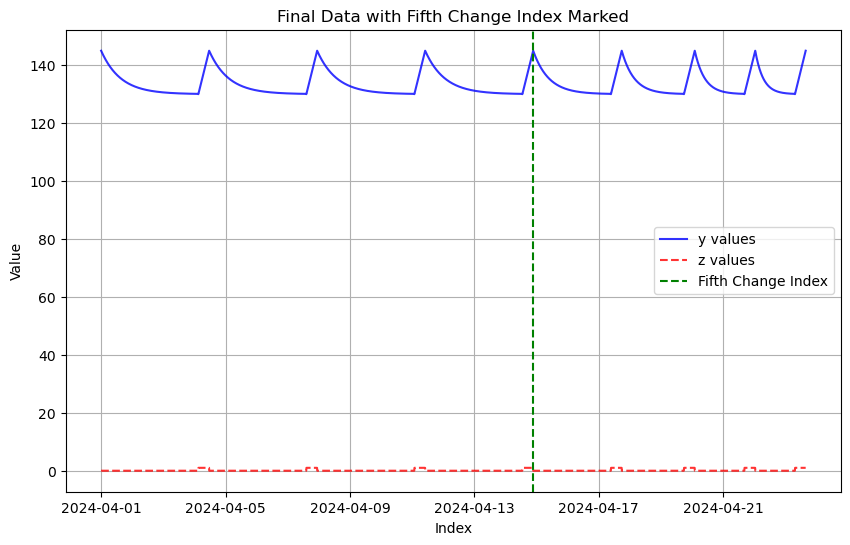

In [86]:
# Identify positions where 'z' changes from 1 to 0
change_positions = (inter_leakage['z'].shift(1) == 1) & (inter_leakage['z'] == 0)

# Find the index of the fifth occurrence
fifth_change_index = change_positions[change_positions].index[3]

# Display the index
print(fifth_change_index)
plt.figure(figsize=(10, 6))
plt.plot(inter_leakage.index, inter_leakage['y'], label='y values', color='b', alpha=0.8)
plt.plot(inter_leakage.index, inter_leakage['z'], label='z values', color='r', linestyle='--', alpha=0.8)

# Mark the fifth change index
plt.axvline(x=fifth_change_index, color='g', linestyle='--', label='Fifth Change Index')

plt.title('Final Data with Fifth Change Index Marked')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
inter_leakage.to_csv('/home/ubuntu/TL-NAB/data/shf-hpu/inter_leakage.csv')